<img style="float: right; margin: 0px 0px 0px 0px;" src="https://upload.wikimedia.org/wikipedia/commons/2/2d/Logo-ITESO-Vertical-SinFondo-png.png" width="150px" height="150px" />

# Proyecto 2 Simulación

## Simulación del experimento "aguja de Buffon"


21/10/2023

**Datos de los integrantes:**

- **Israel Santiago Gomez:**
- Expediente: 745401
- Correo: israel.santiago@iteso.mx
- **Arturo Hesiquio Casarrubias**
- Expediente: 745514
- Correo: arturo.hesiquio@iteso.mx
- **Erik Gabriel Vega Cervantes**
- Expediente: 745264
- Correo: erik.vega@iteso.mx

<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>


### Objetivos

#### Objetivo general:

- Desarrollar una Simulación Precisa: Crear un programa de simulación que estime el valor de π utilizando el problema de las agujas de Buffon. 
- Asegurarse de que la simulación sea eficiente y pueda manejar un gran número de agujas para obtener estimaciones precisas.

#### Objetivos especificos

- Desarrollar una Simulación Precisa: Crear un programa de simulación que estime el valor de π utilizando el problema de las agujas de Buffon. 
- Asegurarse de que la simulación sea eficiente y pueda manejar un gran número de agujas para obtener estimaciones precisas.

### Modelo que representa el problema:

El problema de la aguja de Buffon es un famoso problema geométrico y estadístico que lleva el nombre del matemático francés Georges-Louis Leclerc, conde de Buffon. Este problema se planteó por primera vez en el siglo XVIII y se ha convertido en un clásico en la teoría de la probabilidad.

Se trata de lanzar una aguja sobre un papel en el que se han trazado rectas paralelas distanciadas entre sí de manera uniforme. Se puede demostrar que si la distancia entre las rectas es igual a la longitud de la aguja, la probabilidad de que la aguja cruce alguna de las líneas es: 

$P = \frac{2}{\pi}$

De esta manera:

$\pi \approx \frac{2N}{A} $

Donde:
- $N$ = el número total de intentos.
- $A$ = el número de veces que la aguja ha cruzado alguna línea.

Si la aguja es más corta que la distancia entre las rectas la probabilidad disminuye proporcionalmente al cociente entre la longitud de la aguja y la distancia entre las rectas, tomando el valor $ \frac{2L}{D\pi}$ donde L es la longitud de la aguja y $D$ la interdistancia entre las rectas.

En este caso:

$\pi \approx \frac{2NL}{AD} $

La tercera situación, en que la longitud de la aguja es mayor que la distancia entre las rectas lleva a un resultado bastante más complicado.

#### Solución matemática

Sea una aguja de longitud $k$ lanzada sobre un plano segmentado por líneas paralelas separadas $d$, unidades. ¿Cuál es la probabilidad que la aguja cruce alguna línea?

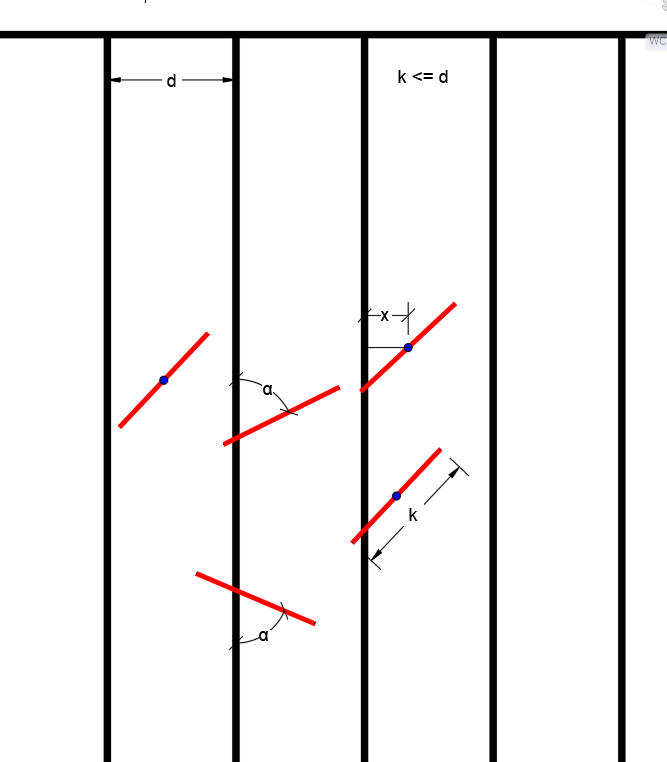

Sabiendo esto podemos definir lo siguiente:

- Si $x$ es la distancia entre el centro de la aguja y la línea más cercana, $x \in [0, d/2] $, dicho de otra manera: $0 \leq x \leq \frac{d}{2}$

- Siendo $\alpha$  el ángulo entre la aguja y las líneas, $\alpha \in [0, \pi /2]$, dicho de otra manera:$0 \leq \alpha \leq \frac{\pi}{2}$.

*También es importante hacer ver que esta solución es para el caso cuando $ d \geq k $  (las agujas miden menos que la distancia entre las líneas).*
    

**Ahora procederemos a generar las funciones de densidades de las variables anteriormente descritas:**

Sabemos que $x$ toma valores entre $0$ y $d/2$ por lo tanto la funcion de densidad de manera grafica nos queda de la siguiente manera:

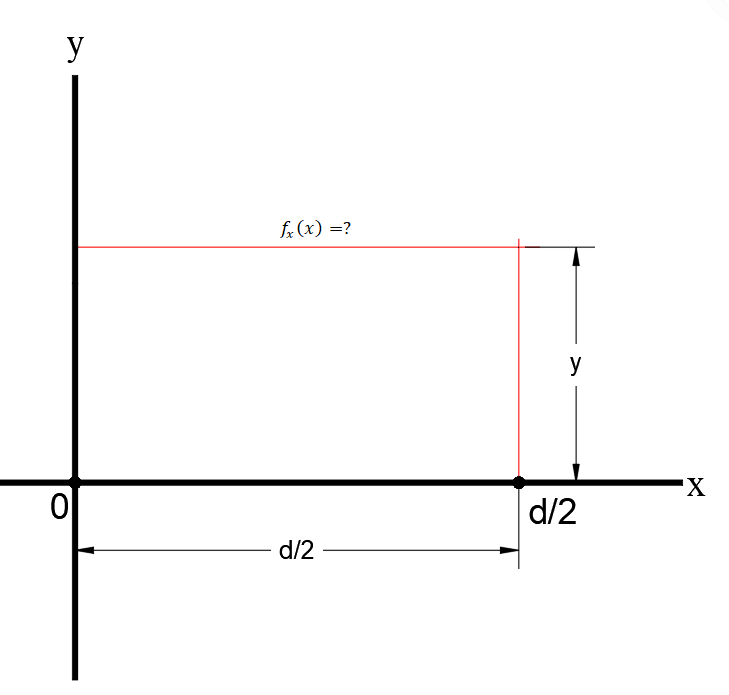

Si sabemos que si es una funcion de densidad el area encerrada vale 1, por lo tanto:

$\frac{d}{2} * y = 1$

Despejando y:

$y = \frac{2}{d}$

Por lo tanto la funcion de densidad queda como:

$f_x (x)= \frac{2}{d}$



**Procediendo de la misma manera para $\alpha$:**

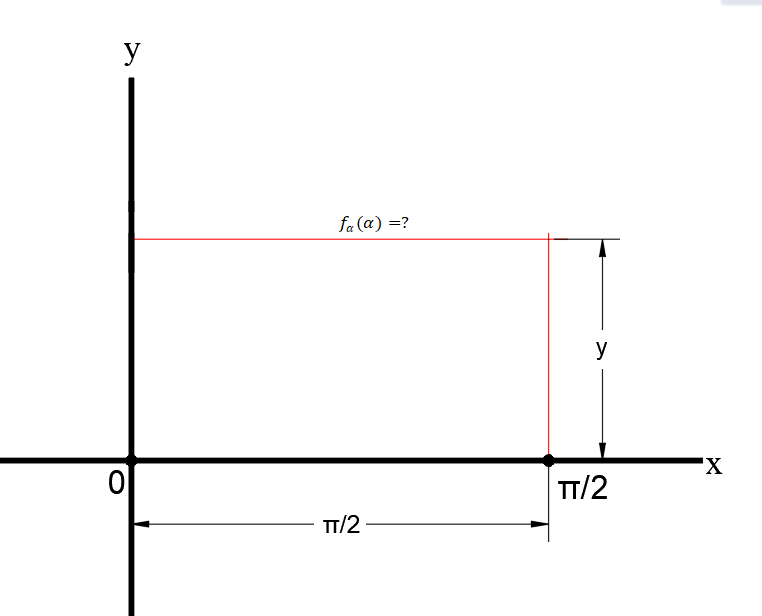

$\frac{\pi}{2} * y = 1$

Despejando y:

$y = \frac{2}{\pi}$

Por lo tanto la funcion de densidad queda como:

$f_\alpha (\alpha)= \frac{2}{\pi}$


**Ahora calculamos la funcion de densidad conjunta:**

Al ser $x$ y $\alpha$ variables aleatorias independientes la funcion de densidad conjunta se puede determinar de la siguiente manera:

$f_{x,\alpha} (x, \alpha) = f_x * f_\alpha$ 

$f_{x,\alpha} (x, \alpha) = \frac{2}{d} * \frac{2}{\pi} = \frac{4}{d\pi}$

La probabilidad se define como la integral dentro del dominio de la funcion de densidad, sin embargo aun nos falta determinal el dominio de $f_x$ el cual determinaremos con trigonometria

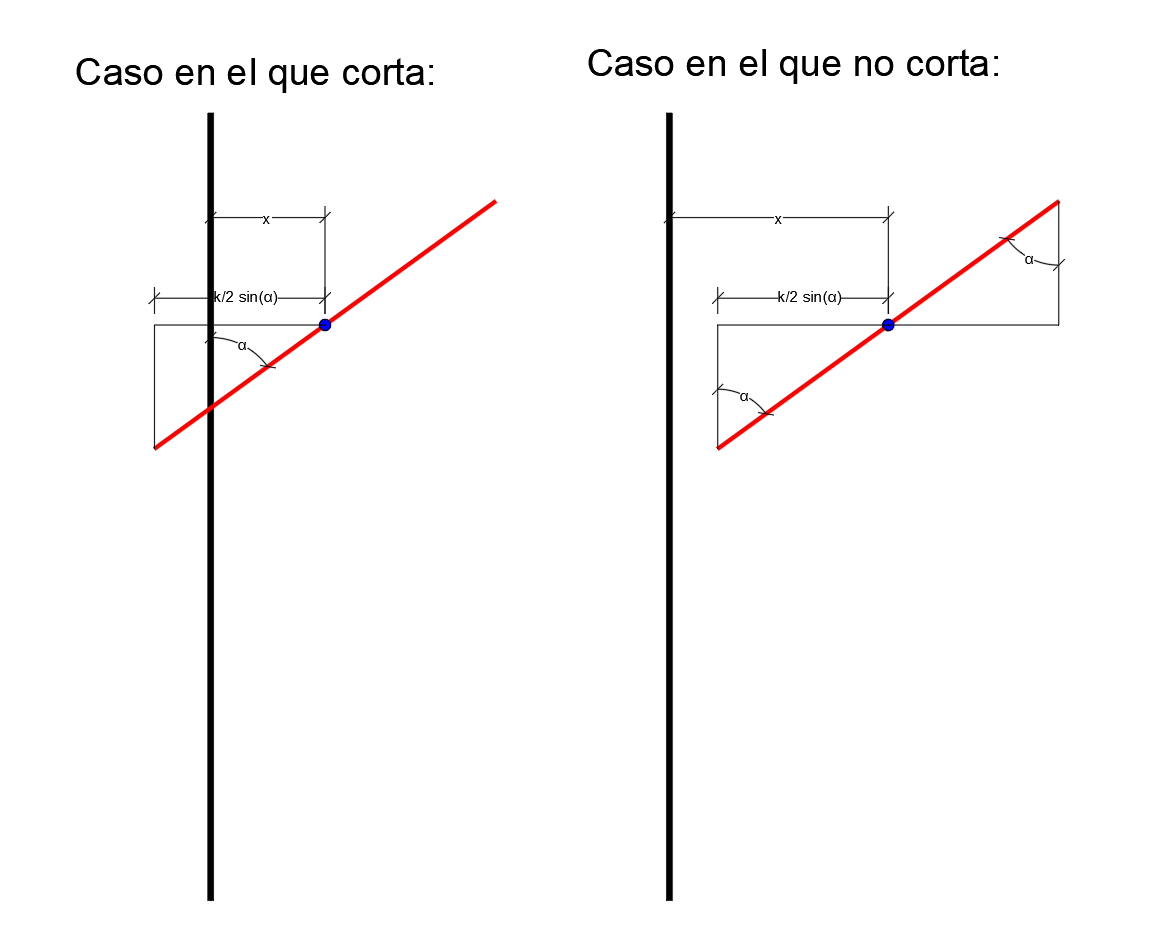

Por lo tanto el dominio de $x$ para cuando una aguja corta la linea es el siguiente:

$0 \leq x \leq \frac{k}{2}\sin{\alpha}$

Ahora ya podemos resolver la integral de probabilidad

$P =\int_{0}^{\frac{\pi}{2}}\int_{0}^{\frac{k}{2}\sin{\alpha}}{\frac{4}{d\pi}} dxd \alpha$

Resolviendo la integral nos queda de la siguiente manera:

In [21]:
import sympy as sp

x = sp.var('x')
alpha = sp.var('alpha')
d = sp.var('d')
k = sp.var('k')

f = 4 / (d * sp.pi)

x_lower = 0
x_upper = (k/2) * sp.sin(alpha)
alpha_lower = 0
alpha_upper = sp.pi/2

res = sp.integrate(f, (x, x_lower, x_upper), (alpha, alpha_lower, alpha_upper))
res

2*k/(pi*d)

$P = \frac{2k}{\pi d}$

### Simulacion

Para la simulacion de este problema hicimos el siguiente codigo

### Codigo:

Estimación de π: 3.1496062992125986


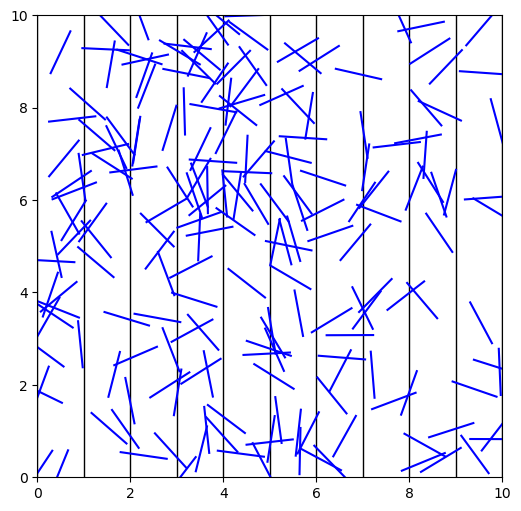

In [14]:
import matplotlib.pyplot as plt
import random
import math

plt.figure(figsize=(6, 6))
plt.vlines(range(11), ymin=0, ymax=10, colors='black', linewidth=1)

lineas_verticales = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
k = 1  # Longitud de las agujas
d = 1  # Espaciemiento entre líneas verticales

plt.xlim(0, 10)
plt.ylim(0, 10)

# Contadores para el número total de agujas y el número de agujas que cruzan líneas
total_agujas = 0
aguja_cruza_linea = 0

def generar_aguja():
    x = random.uniform(0, 10)
    y = random.uniform(0, 10)
    angulo = random.uniform(0, math.pi)
    return x, y, angulo

def dibujar_aguja(x, y, angulo):
    x1 = x - (1/2) * math.cos(angulo)
    x2 = x + (1/2) * math.cos(angulo)
    y1 = y - (1/2) * math.sin(angulo)
    y2 = y + (1/2) * math.sin(angulo)
    plt.plot([x1, x2], [y1, y2], 'b-')
    
    # Verificar si la aguja cruza una línea vertical
    global aguja_cruza_linea
    x_min = min(x1, x2)
    x_max = max(x1, x2)
    for linea in lineas_verticales:
        if x_min <= linea <= x_max:
            aguja_cruza_linea += 1

num_agujas = 200

for i in range(num_agujas):
    x, y, angulo = generar_aguja()
    dibujar_aguja(x, y, angulo)
    total_agujas += 1

pi_estimado = (2 * k * total_agujas) / (d * aguja_cruza_linea)
print("Estimación de π:", pi_estimado)


plt.show()


Esto demuestra que la solución obtenida de la simulacion es factible.

### Conclusiones:

A través de este proyecto, obtuvimos una comprensión profunda de la geometría, la probabilidad y las técnicas de programación mientras planteamos un problema clásico que desafía nuestra comprensión de la estadística y la teoría de la probabilidad.

El desarrollo de este programa no sólo nos permite aplicar conceptos matemáticos a entornos del mundo real, sino que también nos enseña cómo diseñar algoritmos eficientes y realizar simulaciones numéricas utilizando herramientas de programación. Además, al compartir y discutir los resultados con otros estudiantes y profesionales, ampliamos nuestra comprensión y aprendizaje colaborativo.

En última instancia, este proyecto nos recuerda la importancia de cómo la informática y las matemáticas convergen para resolver problemas del mundo real.